<div class="alert alert-danger" role="alert">
<h1>Linear Regression</h1>
<ul>

</ul>
</div>

* y = Ax + B
    - A = slope of curve
    - B = bias 


* For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car.This is the fact that we know and we have data set about this fact.


* This question is that what will be number of car sell if the car price is 100.

In [12]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable

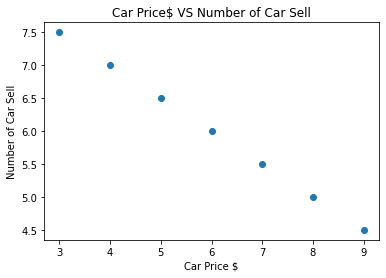

In [16]:
# As a car company we collect this data from previous selling. Lets define car prices
car_price_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_price_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1, 1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# Lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_price_array, number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

* We need to line fit into this data. Aim is fitting line with minimum error.


* Steps of Linear Regression
     - create LinearRegression class
     - define model from this LinearRegression class
     - MSE: mean squared error
     - optimization (SGD: stochastic gradient descent)
     - backpropagation
     - prediction
     

* Lets implement it with Pytorch

epoch 0, loss 25.53628158569336
epoch 50, loss 4.360040187835693
epoch 100, loss 2.9462625980377197
epoch 150, loss 1.99091374874115
epoch 200, loss 1.3453441858291626
epoch 250, loss 0.9091057181358337
epoch 300, loss 0.6143214106559753
epoch 350, loss 0.4151223599910736
epoch 400, loss 0.2805149257183075
epoch 450, loss 0.18955576419830322
epoch 500, loss 0.1280910223722458
epoch 550, loss 0.08655614405870438
epoch 600, loss 0.05848982185125351
epoch 650, loss 0.039524223655462265
epoch 700, loss 0.026707787066698074
epoch 750, loss 0.01804777979850769
epoch 800, loss 0.012195662595331669
epoch 850, loss 0.008240933530032635
epoch 900, loss 0.005568608175963163
epoch 950, loss 0.003762949490919709
epoch 1000, loss 0.002542823785915971


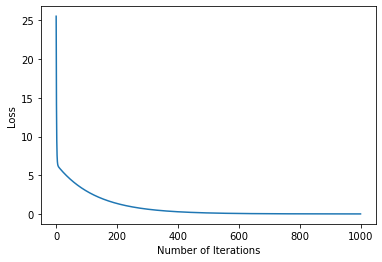

In [17]:
# linear regression with pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # linear function
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim) 

# MSE
mse = nn.MSELoss()

# optimization (find parameters that minimize error)
learning_rate = 0.02 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(car_price_tensor)
    
    # calculate loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
        

plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

* Loss is almost zero that you can see from plot or loss in epoch number 1000.


* Now we have trained model.


* While using trained model, lets predict car prices

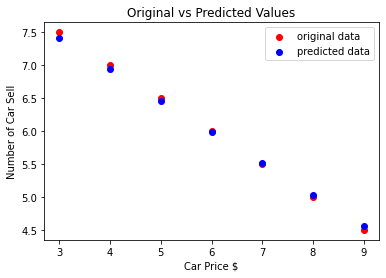

In [20]:
# predict our car price
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_price_array, number_of_car_sell_array, label='original data', color="red")
plt.scatter(car_price_array, predicted, label='predicted data', color="blue")

# predict if car price is 10$, what will be the number of car sell
# predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
# plt.scatter(10, predicted_10.data, label="car price 10$", color="green")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted Values")
plt.show()